In [138]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re    

In [139]:
df1 = pd.read_json('as24_cars.json', encoding='ISO-8859-1')
df = df1.copy()
df

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,...,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,\nVolvo\n,"[\n, S40 ,\n]","Stobbeweg 6, 2461 EX TER AAR, NL","€ 5,499.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 4, \n]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29476,Volvo C30,1.6 D DRIVe Start/Stop R-design,\nVolvo\n,"[\n, C30 ,\n]","Sur rendez-vous, 5060 Sambreville, BE","€ 7,300.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 3, \n]","[\n, Belgium, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29477,Volvo S90,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,\nVolvo\n,"[\n, S90 ,\n]","Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL","€ 29,900.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 4, \n]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29478,Volvo S80,2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...,\nVolvo\n,"[\n, S80 ,\n]","Lage Ham 106, 5102 AE DONGEN, NL","€ 4,440.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 4, \n]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [157]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'Body type', 'Type', 'Doors', 'Country version', 'Offer number',
       'Warranty', 'Mileage', 'First registration', 'Gearbox', 'Fuel type',
       'Colour', 'Paint', 'desc', 'seller', 'Seats', 'Power', 'Engine size',
       'Gears', 'CO₂-emissions', 'Manufacturer colour', 'Drivetrain',
       'Cylinders', 'Fuel consumption', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', '\nExtras\n',
       'Empty weight', 'Model code', 'General inspection', 'Last service',
       'Full service history', 'Non-smoker vehicle', 'Emission class',
       'Emissions sticker', 'Upholstery colour', 'Upholstery',
       'Production date', 'Previous owner', 'Other fuel types',
       'Power consumption', 'Energy efficiency class', 'CO₂-efficiency',
       'Fuel consumption (WLTP)', 'CO₂-emissions (WLTP)', 'Available from',
       'Taxi or rental car', 'Availability', 'Last timing b

In [159]:
#Convert column names to lowercase and snake_case
df.columns = (
    df.columns
    .str.strip() #Remove any leading/trailing whitespaces
    .str.lower() #Convert to lowercase
    .str.replace(r'[^\w\s]', '', regex=True) #Remove special characters
    .str.replace(r'\s+', '_', regex=True) #Replace spaces with underscores
)
df.columns #Display the updated column names
    

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co₂emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'nonsmoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co₂efficiency',
       'fuel_consumption_wltp', 'co₂emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_

In [161]:
#Null Value Analysis Function
def analyze_null_values(df):
    """
    Compute null value counts and percentages for each column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): Input DataFrame to analyze

    Returns:
    pandas.DataFrame: DataFrame with null count and percentage for each column
    """
    #Calculate null counts
    null_counts = df.isnull().sum()
    #Calculate null percentages
    null_percentages = (df.isnull().sum() / len(df)) * 100
    #Combine into a single DataFrame
    null_analysis = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': null_percentages.round(2)
    })
    return null_analysis.sort_values(by = 'Null Percentage')

null_summary = analyze_null_values(df)
null_summary







,Null Count,Null Percentage
make_model,850,2.88
short_description,850,2.88
make,850,2.88
model,850,2.88
location,850,2.88
price,850,2.88
body_type,850,2.88
type,850,2.88
seller,850,2.88
mileage,851,2.89


In [163]:
def drop_high_missing_columns(df, threshold=90):
    """
    Drops columns with a percentage of missing values greater than the specified threshold.

    Parameters:
    df(pd.DataFrame): The input DataFrame.
    threshold (float): The percentage threshold for dropping columns (default is 90).

    Returns:
    pd.DataFrame: The DataFrame with columns removed.
    list: The list of dropped columns.
    """
    missing_percentages = df.isnull().mean() * 100 #Calculate percentage of missing values
    columns_to_drop = missing_percentages[missing_percentages > threshold].index #Columns exceeding threshold
    df = df.drop(columns=columns_to_drop) #Drop the columns
    return df, list(columns_to_drop)
df, columns_to_drop = drop_high_missing_columns(df, threshold=90)
null_summary = analyze_null_values(df)
print('Dropped columns:', columns_to_drop)
print(null_summary)  #Updated null summary

    
    

Dropped columns: ['last_service', 'other_fuel_types', 'power_consumption', 'fuel_consumption_wltp', 'co₂emissions_wltp', 'available_from', 'taxi_or_rental_car', 'availability', 'last_timing_belt_change', 'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership']
                         Null Count  Null Percentage
make_model                      850             2.88
short_description               850             2.88
make                            850             2.88
model                           850             2.88
location                        850             2.88
price                           850             2.88
body_type                       850             2.88
type                            850             2.88
seller                          850             2.88
mileage                         851             2.89
first_registration              852             2.89
gearbox                        1098             3.72
doors                          1209  

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  object 
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  object 
 9   country_version          16889 non-null  object 
 10  offer_number             23100 non-null  object 
 11  warranty                 15784 non-null  object 
 12  mileage                  28629 non-null  object 
 13  first_registration       28628 non-null  object 
 14  gearbox               

In [167]:
df.drop(columns = ['short_description', 'model', 
                   'country_version', 'offer_number',
                   'colour', 'paint', 'desc',
                   'manufacturer_colour',
                   'model_code', 'general_inspection',
                   'nonsmoker_vehicle', 'emission_class','emissions_sticker', 
                   'upholstery_colour','production_date', 
                   'co₂efficiency'], inplace=True)
df.info()
                   
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   make_model               28630 non-null  object
 1   make                     28630 non-null  object
 2   location                 28630 non-null  object
 3   price                    28630 non-null  object
 4   body_type                28630 non-null  object
 5   type                     28630 non-null  object
 6   doors                    28271 non-null  object
 7   warranty                 15784 non-null  object
 8   mileage                  28629 non-null  object
 9   first_registration       28628 non-null  object
 10  gearbox                  28382 non-null  object
 11  fuel_type                26843 non-null  object
 12  seller                   28630 non-null  object
 13  seats                    25505 non-null  object
 14  power                    28058 non-nul

In [169]:
null_summary2 = analyze_null_values(df)
null_summary2

,Null Count,Null Percentage
make_model,850,2.88
make,850,2.88
location,850,2.88
price,850,2.88
body_type,850,2.88
type,850,2.88
seller,850,2.88
mileage,851,2.89
first_registration,852,2.89
gearbox,1098,3.72


In [173]:
#Cleaning make column
df['make'] = df['make'].str.replace('\n', '', regex=False)

In [175]:
#Cleaning columns
def clean_columns(df, column_names):
    #Create a copy of the DataFrame to avoid modifying the original
    cleaned_df = df.copy()
    #Loop through the special column names
    for column in column_names:
        cleaned_df[column] = cleaned_df[column].astype(str)
        #Clean the column using the extaction method
        cleaned_df[column] = cleaned_df[column].apply(lambda x: x.split(',')[1].strip() if ',' in str(x) else x)
    return cleaned_df


In [177]:
cleaned_df = clean_columns(df,
                           column_names=['body_type', 'type', 'doors',
                                         'warranty', 'seats', 'drivetrain'])

In [197]:
#Cleaning the columns
def clean_data(df, columns):
    def clean_cell(cell):
        """Helper function to clean individual cell values."""
        if isinstance(cell, str):
            #Remove specific unwanted characters '[', ']', and '\n' without affecting other text
            cell = cell.strip('[]').replace('\\n', '').replace("'", "")
        return cell
    df_cleaned = df.copy()
    for column in columns:
        df_cleaned[column] = df_cleaned[column].astype(str)
        #Apply the cleaning function to each cell in the column
        df_cleaned[column] = df_cleaned[column].apply(clean_cell)
    return df_cleaned
            

In [201]:
cleaned_columns = ['gearbox', 'power', 'gears', 'engine_size',
                   'empty_weight', 'extras', 'cylinders', 'safety_security',
                   'entertainment_media', 'comfort_convenience',
                   'fuel_consumption', 'previous_owner'  
                  ]
cleaned_df = clean_data(cleaned_df, columns=cleaned_columns)

In [191]:
numeric_columns = ['price', 'mileage', 'co₂emissions', 'empty_weight', 
                   'engine_size', 'warranty'
                  ]

In [232]:
# Cleaning numeric columns
def clean_numeric(df, columns):
    def clean_cell(cell):
        """Helper function to clean individual cell values."""
        if isinstance(cell, str):
            # Extract numbers using regex
            numbers = re.findall(r'\d+', cell)
            # Join the numbers together (in case there are multiple groups)
            if numbers:
                cleaned_number = ''.join(numbers)
            else:
                cleaned_number = np.nan
        else:
            cleaned_number = cell
        return cleaned_number

    df_cleaned = df.copy()
    for column in columns:
        df_cleaned[column] = df_cleaned[column].astype(str)
        # Apply the cleaning function to each cell in the column
        df_cleaned[column] = df_cleaned[column].apply(clean_cell)
    return df_cleaned

In [234]:
cleaned_df = clean_numeric(cleaned_df, columns=numeric_columns)
cleaned_df[numeric_columns].head(10)

,price,mileage,co₂emissions,empty_weight,engine_size,warranty
0,16950,120200,NaN,NaN,NaN,24
1,80900,5000,0,NaN,1,24
2,69900,18900,NaN,NaN,1991,12
3,46990,18995,NaN,NaN,1991,12
4,16800,197000,NaN,1545,2143,12
5,4690,165000,196,1465,1799,NaN
6,22550,83339,NaN,NaN,NaN,12
7,26900,48900,NaN,1450,1991,24
8,44999,56876,168,NaN,1991,NaN
9,23900,21854,NaN,1365,1991,12


In [236]:
#Function to extract the last number from previous owner column
def extract_last_number(text):
    #Find all numbers in the string
    numbers = re.findall(r'\d+', text)
    #Return the last number found
    return float(numbers[-1]) if numbers else np.nan

In [238]:
#Apply the function to the previous owner column and create a new column num previous owners
cleaned_df['previous_owner'] = cleaned_df['previous_owner'].apply(extract_last_number)

In [240]:
def clean_and_format_columns(df, columns):
    """
    Converts specified columns to numeric and formats them to show 3 decimal places.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    columns (list): List of column names to be processed.

    Returns:
    pd.DataFrame: The cleaned and formatted dataframe.
    """
    #Convert columns to numeric, handling NaN values
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    #Format the columns to always show three decimal places
    for column in columns:
        df[column] = df[column].apply(lambda x: float(f"{x:.3f}") if pd.notna(x) else np.nan)

    return df

In [242]:
#Numeric columns 'price', 'mileage', 'co₂emissions', 'empty_weight'
columns_to_clean = ['price', 'mileage', 'co₂emissions', 'empty_weight', 'engine_size', 'warranty', 'previous_owner']
cleaned_df = clean_and_format_columns(cleaned_df, columns_to_clean)

In [244]:
cleaned_df[numeric_columns].head(10)

,price,mileage,co₂emissions,empty_weight,engine_size,warranty
0,16950.0,120200.0,NaN,NaN,NaN,24.0
1,80900.0,5000.0,0.0,NaN,1.0,24.0
2,69900.0,18900.0,NaN,NaN,1991.0,12.0
3,46990.0,18995.0,NaN,NaN,1991.0,12.0
4,16800.0,197000.0,NaN,1545.0,2143.0,12.0
5,4690.0,165000.0,196.0,1465.0,1799.0,NaN
6,22550.0,83339.0,NaN,NaN,NaN,12.0
7,26900.0,48900.0,NaN,1450.0,1991.0,24.0
8,44999.0,56876.0,168.0,NaN,1991.0,NaN
9,23900.0,21854.0,NaN,1365.0,1991.0,12.0


In [246]:
#Function to extract combined fuel consumption
def extract_combined_fuel_consumption(fuel_consumption):
    match = re.search(r'(\d+\.\d+) l/100 km \(comb\.\)', fuel_consumption)
    if match:
        return float(match.group(1))
    return None

In [250]:
#Apply the function to create a new column
cleaned_df['avg_fuel_consumption'] = cleaned_df['fuel_consumption'].apply(extract_combined_fuel_consumption)

In [252]:
cleaned_df['avg_fuel_consumption'].head(5)

0    NaN
1    NaN
2    8.4
3    7.3
4    4.9
Name: avg_fuel_consumption, dtype: float64

In [254]:
#Extract the horsepower as a number 
cleaned_df['horsepower'] = cleaned_df['power'].str.extract(r'\((\d+) hp\)').astype(float)

In [256]:
cleaned_df['horsepower']

0          NaN
1        292.0
2        421.0
3        306.0
4        136.0
         ...  
29475    170.0
29476    114.0
29477    254.0
29478    200.0
29479      NaN
Name: horsepower, Length: 29480, dtype: float64

In [258]:
print(cleaned_df['fuel_type'].nunique())
#Get unique values in the 'fuel_type' column
unique_fuel_types = cleaned_df['fuel_type'].unique()
print(unique_fuel_types) #Print the unique_fuel_types

46
['Diesel' 'Electric' 'Gasoline' 'Regular/Benzine 91' nan
 'Regular/Benzine 91 (Particle filter)' 'Super 95' 'Super E10 95' 'LPG'
 'Diesel (Particle filter)' 'Gasoline (Particle filter)'
 'Super 95 (Particle filter)' 'Liquid petroleum gas (LPG)' 'Super Plus 98'
 'Super E10 95 (Particle filter)' 'Regular/Benzine E10 91'
 'Super Plus E10 98' 'Super Plus E10 98 (Particle filter)' 'Others'
 'Super Plus 98 (Particle filter)'
 'Liquid petroleum gas (LPG) / Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Biogas'
 'Ethanol' 'Regular/Benzine E10 91 (Particle filter)' 'CNG'
 'Liquid petroleum gas (LPG) (Particle filter) / Super 95 / Super E10 95'
 'Others (Particle filter)'
 'Liquid petroleum gas (LPG) / Super 95 / Super E10 95'
 'LPG (Particle filter)' 'Electric (Particle filter)' 'Domestic gas L'
 'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95'
 'CNG (Particle filter)' 'Domestic gas H'
 'Domestic gas L (Particle filter)' 'Biogas'
 'Do

In [278]:
# Define the mapping dictionary
fuel_type_mapping = {
'Diesel': 'Diesel',
'Electric': 'Electric',
'Gasoline': 'Benzine',
'Regular/Benzine 91':'Benzine',
'Regular/Benzine 91 (Particle filter)': 'Benzine',
'Super 95': 'Benzine',
'Super E10 95': 'Benzine',
'LPG' : 'LPG',
'Diesel (Particle filter)': 'Diesel',
'Gasoline (Particle filter)': 'Benzine',
'Super 95 (Particle filter)': 'Benzine',
'Liquid petroleum gas (LPG)': 'LPG',
'Super Plus 98': 'Benzine',
'Super E10 95 (Particle filter)': 'Benzine',
'Super Plus E10 98 (Particle filter)': 'Benzine',
'Others': 'Other',
'Super Plus 98 (Particle filter)': 'Benzine',
'Liquid petroleum gas (LPG) / Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Biogas': 'LPG',
'Ethanol': 'Other',
'Regular/Benzine E10 91 (Particle filter)': 'Benzine',
'CNG': 'Other',
'Liquid petroleum gas (LPG) (Particle filter) / Super 95 / Super E10 95': 'LPG',
'Others (Particle filter)': 'Other',
'Liquid petroleum gas (LPG) / Super 95 / Super E10 95': 'LPG',
'LPG (Particle filter)': 'LPG',
'Electric (Particle filter)': 'Electric',
'Domestic gas L': 'LPG',
'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95': 'LPG', 
'CNG (Particle filter)': 'Other',
'Domestic gas H': 'Other',
'Domestic gas L (Particle filter)': 'Other',
'Biogas': 'Other',
'Domestic gas H / Super E10 95 / Super Plus E10 98 / Super 95 / Super Plus 98 / Domestic gas L': 'LPG' ,
'Domestic gas L / Super 95 / Domestic gas H': 'LPG',
'Super 95 / Super Plus 98 / Liquid petroleum gas (LPG)': 'LPG',
'Liquid petroleum gas(LPG) (Particle filter)': 'LPG',
'Liquid petroleum gas(LPG) / Super 95': 'LPG',
'Liquid petroleum gas (LPG) / Super 95 / Super E10 95 / Super Plus 98': 'LPG',
'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98': 'LPG',
'Liquid petroleun gas (LPG) / Super E10 95': 'LPG',
'Liquid petroleun gas (LPG) / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95': 'LPG',
'Hydrogen': 'Other',
'Super 95 (Particle filter) / Super E10 95 / Ethanol': 'Benzine',
'Super 95 / Liquid petroleum gas (LPG)': 'LPG',
'nan' :np.nan
}
cleaned_df['categorized_fuel_type'] = cleaned_df['fuel_type'].map(fuel_type_mapping)

In [282]:
#Check the result
cleaned_df[['fuel_type', 'categorized_fuel_type']].sample(10)

,fuel_type,categorized_fuel_type
16719,Gasoline,Benzine
1437,Regular/Benzine 91,Benzine
9239,Diesel,Diesel
14579,Super 95 (Particle filter),Benzine
3870,Super 95,Benzine
14489,Regular/Benzine 91,Benzine
22564,Diesel (Particle filter),Diesel
27758,Diesel,Diesel
4355,Gasoline,Benzine
17245,Gasoline,Benzine


In [284]:
print(cleaned_df['fuel_type'].nunique())
print(cleaned_df['categorized_fuel_type'].nunique())

46
5


In [286]:
#Convert first registration to datetime 
cleaned_df['first_registration'] = pd.to_datetime(cleaned_df['first_registration'], format= '%m/%Y', errors='coerce')
#Assuming year is 2022
assuming_year = 2022
#Calculate vehicle age 
cleaned_df['age'] = assuming_year-cleaned_df['first_registration'].dt.year
cleaned_df['age'].sample(5)
                

7961     21.0
635      30.0
16104     5.0
22194     5.0
26577    15.0
Name: age, dtype: float64

In [288]:
#Convert columns to numeric
cleaned_df['doors'] = pd.to_numeric(cleaned_df['doors'], errors = 'coerce')
cleaned_df['gears'] = pd.to_numeric(cleaned_df['gears'], errors = 'coerce')
cleaned_df['cylinders'] = pd.to_numeric(cleaned_df['cylinders'], errors = 'coerce')
                                    

In [290]:
cleaned_df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5.0,4.0,5.0,5.0,5.0
warranty,24.0,24.0,12.0,12.0,12.0
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
first_registration,2016-06-01 00:00:00,2022-06-01 00:00:00,2020-07-01 00:00:00,2020-01-01 00:00:00,2015-09-01 00:00:00


In [318]:
def count_items(series) :
    """
    Counts the number of items in each entry of a pandas Series.
    Returns None for NaN or empty entries.
    """
      
    def count_logic(x):
        # Check for NaN or string representation of NaN
        if pd.isna(x) or (isinstance(x, str) and x.lower() == 'nan'):
            return None 
        elif isinstance(x, str) and x.strip() == '':
            return None 
        else:
            #Split the string by ',' and return the count 
            return len(x.split(','))
            
    return series.apply(count_logic)
# Apply the counting function to relevant columns
cleaned_df['comfort_convenience_counts'] = count_items(cleaned_df['comfort_convenience'])
cleaned_df['entertainment_media_counts'] = count_items(cleaned_df['entertainment_media'])
cleaned_df['extra_counts'] = count_items(cleaned_df ['extras'])
cleaned_df['safety_security_counts'] = count_items(cleaned_df['safety_security'])

# Display the DataFrame to check results
cleaned_df[['comfort_convenience_counts',
            'entertainment_media_counts',
            'extra_counts',
            'safety_security_counts']]

,comfort_convenience_counts,entertainment_media_counts,extra_counts,safety_security_counts
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,4.0,1.0,1.0,5.0
4,5.0,4.0,NaN,6.0
...,...,...,...,...
29475,9.0,2.0,2.0,10.0
29476,10.0,7.0,3.0,15.0
29477,16.0,8.0,2.0,9.0
29478,11.0,1.0,4.0,12.0


In [320]:
def determine_category(cell):
    #Check if the cell is NaN or an empty string
    if pd.isna(cell) or cell == '' or cell == 'nan':
        return np.nan
    #Remove any empty strings that might result from splitting
    #Split and clean characteristics
    characteristics = [item.strip() for item in str(cell).split(",")]
    characteristics = [char for char in characteristics if char and char.lower() != 'nan']
    characteristic_len = len(characteristics)

    #categories_present = {
        #characteristic_to_category,get(char) for char in characteristicsif char in characteristic_to_category}
    if characteristic_len>19 :
        return "Premium"
    elif characteristic_len>9:
        return "Standard"
    elif characteristic_len>=1:
        return "Basic"
    else:
        return np.nan

In [336]:
#Apply the function
cleaned_df['comfort_convenience_category'] = cleaned_df['comfort_convenience'].apply(determine_category)
cleaned_df['comfort_convenience_category'].value_counts()

comfort_convenience_category
Standard    10318
Basic        9603
Premium      5512
Name: count, dtype: int64

In [338]:
#Function to determine the category based on priority
def determine_category_extras(cell):
    #Check if the cell is NaN or an empty string
    if pd.isna(cell) or cell == '' or cell == 'nan':
        return np.nan
    #Split and clean characteristics
    characteristics = [item.strip() for item in str(cell).split(",")]
    #Remove any empty strings that might result from splitting
    characteristics = [char for char in characteristics if char and char.lower() != 'nan']
    characteristic_len = len(characteristics)
    if characteristic_len>8:
        return "Premium"
    elif characteristic_len>3:
        return "Standard"
    elif characteristic_len>=1:
        return "Basic"
    else:
        return np.nan

In [348]:
cleaned_df["extras_category"] = cleaned_df["extras"].apply(determine_category_extras)
cleaned_df['extras_category'].value_counts()

extras_category
Basic       10776
Standard     8567
Premium      4137
Name: count, dtype: int64

In [350]:
#Function to determine the category based on priority
def determine_category_entertainment_media(cell):
    #Check if the cell is NaN or an empty string
    if pd.isna(cell) or cell == '' or cell == 'nan':
        return np.nan
    #Split and clean characteristics
    characteristics = [item.strip() for item in str(cell).split(",")]
    #Remove any empty strings that might result from splitting
    characteristics = [char for char in characteristics if char and char.lower() != 'nan']
    characteristic_len = len(characteristics)
    if characteristic_len>8:
        return "Premium"
    elif characteristic_len>3:
        return "Standard"
    elif characteristic_len>=1:
        return "Basic"
    else:
        return np.nan

In [352]:
#Apply the function
cleaned_df["entertainment_media_category"] = cleaned_df["entertainment_media"].apply(determine_category_entertainment_media)
cleaned_df['entertainment_media_category'].value_counts()

entertainment_media_category
Standard    10463
Basic        7156
Premium      6025
Name: count, dtype: int64

In [344]:
def determine_category_safety_security(cell):
    #Check if the cell is NaN or an empty string
    if pd.isna(cell) or cell == '' or cell == 'nan':
        return np.nan
    #Split and clean characteristics
    characteristics = [item.strip() for item in str(cell).split(",")]
    #Remove any empty strings that might result from splitting
    characteristics = [char for char in characteristics if char and char.lower() != 'nan']
    characteristic_len = len(characteristics)
    if characteristic_len>=20:
        return "Premium"
    elif characteristic_len>=10:
        return "Standard"
    elif characteristic_len>=1:
        return "Basic"
    else:
        return np.nan

In [346]:
cleaned_df["safety_security_category"] = cleaned_df["safety_security"].apply(determine_category_safety_security)

In [354]:
cleaned_df[['comfort_convenience_category','safety_security_category',
            'extras_category', 'entertainment_media_category']].sample(10).T

,5499,17414,13402,1896,9420,5360,1552,16215,19697,25888
comfort_convenience_category,Standard,Basic,Standard,Standard,NaN,Standard,Basic,Basic,NaN,Basic
safety_security_category,Standard,Basic,Standard,Premium,NaN,Standard,Basic,Standard,NaN,Basic
extras_category,Basic,NaN,Premium,Standard,NaN,Standard,Basic,Standard,NaN,Basic
entertainment_media_category,Standard,Basic,Standard,Basic,NaN,Standard,Basic,Standard,NaN,NaN


In [356]:
cleaned_df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5.0,4.0,5.0,5.0,5.0
warranty,24.0,24.0,12.0,12.0,12.0
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
first_registration,2016-06-01 00:00:00,2022-06-01 00:00:00,2020-07-01 00:00:00,2020-01-01 00:00:00,2015-09-01 00:00:00


In [360]:
dropped_columns = ['first_registration', 'power', 'fuel_consumption',
                   'comfort_convenience', 'extras', 'entertainment_media', 'safety_security']
cleaned_df.drop(columns=dropped_columns, inplace=True)
cleaned_df = cleaned_df.replace('nan', np.nan)

In [362]:
cleaned_final = cleaned_df.copy()
cleaned_final.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5.0,4.0,5.0,5.0,5.0
warranty,24.0,24.0,12.0,12.0,12.0
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
gearbox,Manual,Automatic,Automatic,Automatic,Automatic


In [364]:
cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   make_model                    28630 non-null  object 
 1   make                          28630 non-null  object 
 2   location                      28630 non-null  object 
 3   price                         28630 non-null  float64
 4   body_type                     28630 non-null  object 
 5   type                          28630 non-null  object 
 6   doors                         28271 non-null  float64
 7   warranty                      13465 non-null  float64
 8   mileage                       28629 non-null  float64
 9   gearbox                       28382 non-null  object 
 10  fuel_type                     26843 non-null  object 
 11  seller                        28630 non-null  object 
 12  seats                         25505 non-null  object 
 13  e

In [366]:
cleaned_final.describe().T

,count,mean,std,min,25%,50%,75%,max
price,28630.0,23555.202131,25953.706540,490.0,11990.0,17980.0,27990.0,1346900.0
doors,28271.0,4.147855,1.207979,1.0,3.0,5.0,5.0,6.0
warranty,13465.0,17.777274,14.554171,0.0,12.0,12.0,12.0,142.0
mileage,28629.0,72627.043802,67628.435048,0.0,20290.0,57500.0,106673.0,1440000.0
engine_size,27227.0,1755.001983,1029.859982,0.0,1332.0,1598.0,1984.0,99900.0
gears,18954.0,5.884932,1.476884,0.0,5.0,6.0,6.0,10.0
co₂emissions,18594.0,134.309616,145.537994,0.0,107.0,127.0,159.0,15168.0
cylinders,18852.0,4.075854,1.003403,0.0,4.0,4.0,4.0,26.0
empty_weight,17758.0,1421.411702,335.601925,75.0,1206.0,1387.0,1598.0,15590.0
previous_owner,14015.0,1.432679,0.860973,1.0,1.0,1.0,2.0,14.0


In [370]:
numerical_data =  cleaned_final.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                               price     doors  warranty   mileage  \
price                       1.000000  0.007732  0.097242 -0.304741   
doors                       0.007732  1.000000  0.035480 -0.277501   
warranty                    0.097242  0.035480  1.000000 -0.285140   
mileage                    -0.304741 -0.277501 -0.285140  1.000000   
engine_size                 0.313368 -0.263862 -0.036579  0.099853   
gears                       0.340632  0.077960  0.012571 -0.105283   
co₂emissions                0.070272 -0.178796 -0.075125  0.088488   
cylinders                   0.367945 -0.353712 -0.078518  0.128965   
empty_weight                0.537410  0.015718  0.041957 -0.054195   
previous_owner             -0.193956 -0.286663 -0.056052  0.428763   
avg_fuel_consumption        0.212262 -0.432745 -0.011208  0.113799   
horsepower                  0.672286 -0.220212  0.034452 -0.094082   
age                        -0.152688 -0.509157 -0.264081  0.468565   
comfort_convenience_

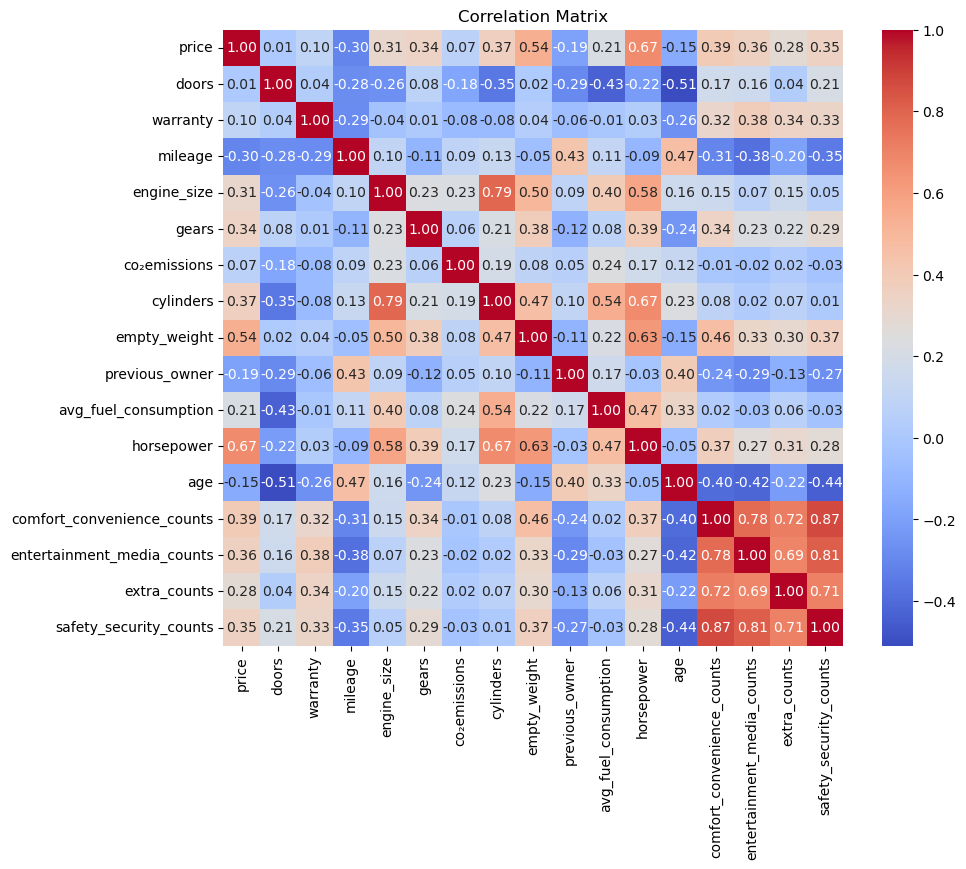

In [372]:
#Create a heatmap fot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [374]:
cleaned_final.to_csv('cleaned_df.csv', index=False)